In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
wine_data = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
wine_data.shape

(129971, 14)

In [4]:
wine_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
wine_data['year'] = wine_data['title'].str.extract(r'(\d{4})')
wine_data['year'] = wine_data['year'].astype(str)

In [6]:
#wine_data['country'].value_counts() #Italy is third for most value counts!

In [7]:
wine_data['title'].nunique()

118840

In [8]:
wine_data.duplicated().sum() #There are no rows completely duplicated

0

In [9]:
wine_data.duplicated(subset=['title', 'variety']).sum() 
#The other 250 are duplicated titles with different varieties(grapes)

10881

In [10]:
wine_data.drop_duplicates(subset=['title', 'variety'], keep='first', inplace=True)

In [11]:
wine_data.shape

(119090, 15)

In [12]:
wine_data.duplicated(subset=['title', 'variety']).sum() 

0

In [13]:
# Sort the countries based on the count of entries in descending order
sorted_countries = wine_data['country'].value_counts().sort_values(ascending=False)

# Select the top 10 countries
top_10_countries = sorted_countries.head(10)

top_countries_df = pd.DataFrame(top_10_countries).reset_index(drop=False)
top_countries_df

,country,count
0,US,50233
1,France,19970
2,Italy,17812
3,Spain,6026
4,Portugal,5222
5,Chile,4179
6,Argentina,3543
7,Austria,3024
8,Australia,2183
9,Germany,1990


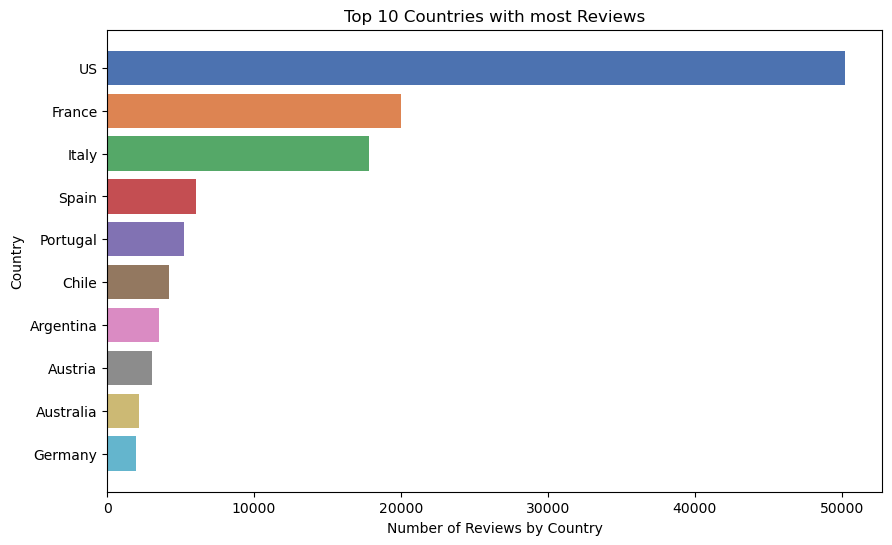

In [14]:
colors = sns.color_palette("deep", len(top_countries_df))

plt.figure(figsize=(10, 6))
plt.barh(top_countries_df['country'], top_countries_df['count'], color= colors)
plt.xlabel('Number of Reviews by Country')
plt.ylabel('Country')
plt.title('Top 10 Countries with most Reviews')
plt.gca().invert_yaxis() 
plt.show()

In [15]:
wine_data['province'].value_counts() #Top province is California

province
California         33472
Washington          7945
Bordeaux            5531
Tuscany             5387
Oregon              4921
                   ...  
Markopoulo             1
Krania Olympus         1
Corinthia              1
Slovenska Istra        1
Neuchâtel              1
Name: count, Length: 425, dtype: int64

In [16]:
# Sort the province based on the count of entries in descending order
sorted_province = wine_data['province'].value_counts().sort_values(ascending=False)

# Select the top 10 province
top_10_province = sorted_province.head(10)

print(top_10_province)

province
California          33472
Washington           7945
Bordeaux             5531
Tuscany              5387
Oregon               4921
Burgundy             3661
Northern Spain       3552
Piedmont             3427
Mendoza Province     3037
New York             2453
Name: count, dtype: int64


In [17]:
#top province within the US
top_provinces_us = wine_data['province'][wine_data['country'] == 'US'].value_counts().sort_values(ascending=False).head(10)
print(top_provinces_us)

province
California    33472
Washington     7945
Oregon         4921
New York       2453
Virginia        722
Idaho           178
Michigan        105
Texas            90
America          80
Colorado         62
Name: count, dtype: int64


In [18]:
wine_data['variety'].value_counts() #Majority are Pinot Noir and Chardonnay (makes sense with Cali being 1)

variety
Pinot Noir                  12239
Chardonnay                  10810
Cabernet Sauvignon           8824
Red Blend                    8224
Bordeaux-style Red Blend     6445
                            ...  
Merlot-Shiraz                   1
Folle Blanche                   1
Forcallà                        1
Tamianka                        1
Bobal-Cabernet Sauvignon        1
Name: count, Length: 707, dtype: int64

In [19]:
# Sort the variety based on the count of entries in descending order
sorted_variety = wine_data['variety'].value_counts().sort_values(ascending=False)

# Select the top 10 variety
top_10_variety = sorted_variety.head(10)

top_variety_df = pd.DataFrame(top_10_variety).reset_index(drop=False)
top_variety_df

,variety,count
0,Pinot Noir,12239
1,Chardonnay,10810
2,Cabernet Sauvignon,8824
3,Red Blend,8224
4,Bordeaux-style Red Blend,6445
5,Riesling,4759
6,Sauvignon Blanc,4566
7,Syrah,3822
8,Rosé,3215
9,Merlot,2889


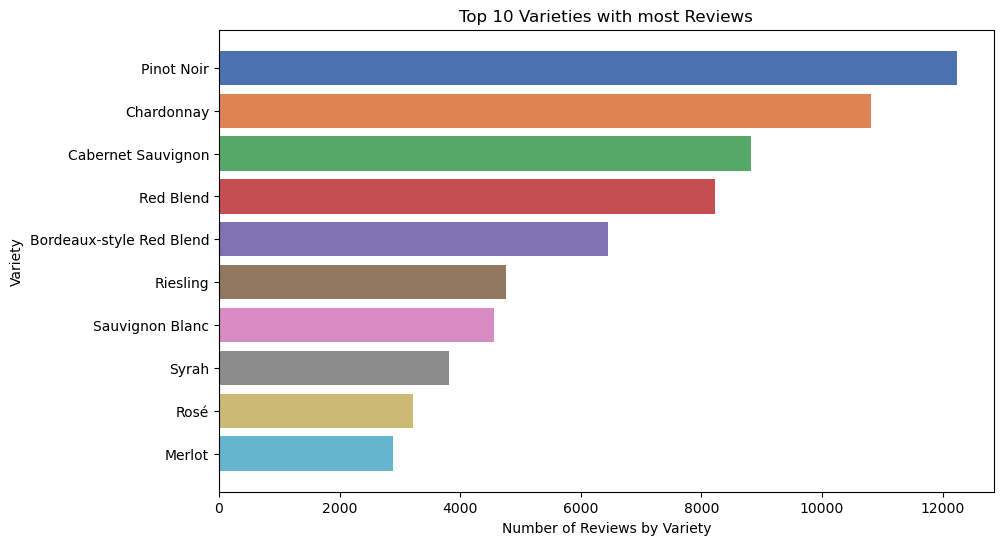

In [20]:
colors = sns.color_palette("deep", len(top_variety_df))

plt.figure(figsize=(10, 6))
plt.barh(top_variety_df['variety'], top_variety_df['count'], color= colors)
plt.xlabel('Number of Reviews by Variety')
plt.ylabel('Variety')
plt.title('Top 10 Varieties with most Reviews')
plt.gca().invert_yaxis() 
plt.show()

In [21]:
wine_data['points'].nunique()

21

In [22]:
#wine_data['points'].value_counts() #Points range from 80 to 100

In [23]:
#WINE BOTTLES WITH PERFECT SCORE

max_point = wine_data[wine_data['points']==wine_data['points'].max()]
max_point.head()

#There are 19 bottles... two of them are only $80

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
345,345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards,nan
7335,7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,NaN,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi,1995
36528,36528,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Krug 2002 Brut (Champagne),Champagne Blend,Krug,2002
39286,39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,NaN,NaN,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia,2007
42197,42197,Portugal,This is the latest release of what has long be...,Barca-Velha,100,450.0,Douro,NaN,NaN,Roger Voss,@vossroger,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha,2008


In [24]:
max_point['price'].value_counts()

price
450.0     2
1500.0    2
80.0      2
350.0     1
210.0     1
259.0     1
460.0     1
550.0     1
200.0     1
150.0     1
250.0     1
617.0     1
270.0     1
359.0     1
650.0     1
848.0     1
Name: count, dtype: int64

### Mention this in the conclusion

In [25]:
#THE TOP 10 VARIETIES WITH THE HIGHEST value_count POINT 88

top_point = wine_data['points'].value_counts().idxmax()

variety_top_value_point = wine_data[wine_data['points'] == top_point]['variety']#.iloc[0]

variety_top_value_point.value_counts().head(10)

variety
Pinot Noir                  1282
Chardonnay                  1231
Red Blend                   1208
Cabernet Sauvignon           950
Bordeaux-style Red Blend     745
Sauvignon Blanc              640
Riesling                     572
Rosé                         417
Syrah                        410
Sangiovese                   385
Name: count, dtype: int64

### Mention this in the conclusion

In [26]:
len(variety_top_value_point)

15159

In [27]:
wine_data['description'].nunique() #Filter out unique values by key words (fruity, acidity, citrus...)

119057

In [28]:
#wine_data['description'].value_counts() TOO MANY DESCRIPTIONS TO SUCCEFULY FILTER OUT

In [29]:
wine_data['variety'].nunique()

707

In [30]:
wine_data['country'].nunique()

43

In [31]:
wine_data.drop(columns=['Unnamed: 0', 'designation', 'region_1', 'region_2',
                        'taster_name', 'taster_twitter_handle'], inplace=True)

In [32]:
wine_data.dtypes

country         object
description     object
points           int64
price          float64
province        object
title           object
variety         object
winery          object
year            object
dtype: object

#### Categorical Data: 
Country, Description, Province, Title, Variety, Winery

#### Numerical Data: 
Points, Price

In [33]:
wine_data.describe(include='object')

,country,description,province,title,variety,winery,year
count,119031,119090,119031,119090,119089,119090,119090
unique,43,119057,425,118840,707,16757,92
top,US,"Hugely delicious, just a joy to drink. So soft...",California,Lucien Lardy 2014 Beaujolais-Villages,Pinot Noir,Wines & Winemakers,2012
freq,50233,2,33472,2,12239,209,14300


In [34]:
wine_data.describe()

,points,price
count,119090.000000,110759.000000
mean,88.445260,35.625529
std,3.094847,42.164715
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [35]:
wine_data.isna().sum() #No Nan values in description, few in country, only 1 in variety

country          59
description       0
points            0
price          8331
province         59
title             0
variety           1
winery            0
year              0
dtype: int64

In [36]:
#Should we drop price? No, it is still interesting to mention the range.

In [37]:
#Find the wine bottle with the highest price

max_price = wine_data[wine_data['price']==wine_data['price'].max()]
display(max_price)

,country,description,points,price,province,title,variety,winery,year
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,2013


In [38]:
#Find the wine with the lowest price

min_price = wine_data[wine_data['price']==wine_data['price'].min()]
display(min_price.head())
int(min_price['points'].mean())

,country,description,points,price,province,title,variety,winery,year
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis,2013
20484,US,"Fruity, soft and rather sweet, this wine smell...",85,4.0,California,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote,2015
29553,Argentina,"Crimson in color but also translucent, with a ...",84,4.0,Mendoza Province,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass,2009
31530,US,"Packaged in a cute yellow recyclable Tetrapak,...",84,4.0,California,Bandit NV Chardonnay (California),Chardonnay,Bandit,nan
59507,US,"Sweet and fruity, this canned wine feels soft ...",83,4.0,California,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties,nan


84

# --------------------------------------------------------------------------------------

In [39]:
vivino_red_data = pd.read_csv("Red.csv", encoding='latin-1')

In [40]:
vivino_red_data.shape

(8666, 8)

In [41]:
#vivino_red_data

In [42]:
vivino_red_data.rename(columns={'ï»¿Name': 'Name'}, inplace=True)

In [43]:
#vivino_red_data

In [44]:
vivino_white_data = pd.read_csv("White.csv", encoding='latin-1')

In [45]:
vivino_white_data.shape

(3764, 8)

In [46]:
#vivino_white_data

In [47]:
vivino_white_data.rename(columns={'ï»¿Name': 'Name'}, inplace=True)
#vivino_white_data

In [48]:
vivino_rose_data = pd.read_csv("Rose.csv", encoding='latin-1')

In [49]:
vivino_rose_data.rename(columns={'ï»¿Name': 'Name'}, inplace=True)

In [50]:
vivino_sparkling_data = pd.read_csv("Sparkling.csv", encoding='latin-1')

In [51]:
vivino_sparkling_data.rename(columns={'ï»¿Name': 'Name'}, inplace=True)

In [52]:
vivino_data = pd.concat([vivino_red_data, vivino_white_data, vivino_rose_data, vivino_sparkling_data], axis=0)

In [53]:
vivino_data.shape

(13834, 8)

In [54]:
vivino_data

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,ChÃ¢teau La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,ChÃ¢teau Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
...,...,...,...,...,...,...,...,...
1002,Special CuvÃ©e Brut AÃ¿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,N.V.
1003,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,N.V.
1004,ImpÃ©rial Brut Champagne N.V.,France,Champagne,MoÃ«t & Chandon,4.1,76037,40.61,N.V.
1005,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,N.V.


In [55]:
vivino_data['Name'] = vivino_data['Name'].str.extract(r'([^\d]+)')

In [56]:
vivino_data.drop(columns=['NumberOfRatings'], inplace = True)

In [57]:
vivino_data.rename(columns= lambda x: x.lower(), inplace=True)
vivino_data.rename(columns= lambda x: x.replace(" ", "_"), inplace=True)

In [58]:
vivino_data.duplicated().sum() #There are no rows completely duplicated

0

In [59]:
vivino_data.duplicated(subset= ['name', 'winery', 'year']).sum()

33

In [60]:
vivino_data.drop_duplicates(subset=['name', 'winery', 'year'], keep='first', inplace=True)

In [61]:
#FUNCTION TO EXTRACT VARIETY FROM NAME IN VIVINO DF

def name_wines(string):
    for item in string:
        if "Pinot Noir" in string:
            return "Pinot Noir"
        elif "Sauvignon Blanc" in string:
            return "Sauvignon Blanc"
        elif "Pinot Gris" in string:
            return "Pinot Gris"
        elif "Pinot Grigio" in string:
            return "Pinot Grigio"
        elif "Pinot Blanc" in string:
            return "Pinot Blanc"
        elif "Moscato" in string:
            return "Moscato"
        elif "Chardonnay" in string:
            return "Chardonnay"
        elif "Cabernet Franc" in string:
            return "Cabernet Franc"
        elif "Cabernet Sauvignon" in string:
            return "Cabernet Sauvignon"
        elif "Centesimino" in string:
            return "Centesimino"
        elif "Cabernet" in string:
            return "Cabernet"
        elif "Colorino" in string:
            return "Colorino"
        elif "Jampal" in string:
            return "Jampal"
        elif "Chancellor" in string:
            return "Chancellor"
        elif "Favorita" in string:
            return "Favorita"
        elif "Sirica" in string:
            return "Sirica"
        elif "Red Blend" in string:
            return "Red Blend"
        elif "Pomerol" in string:
            return "Pomerol"
        elif "Riesling" in string:
            return "Riesling"
        elif "Rosé" in string:
            return "Rosé"
        elif "Primitivo" in string:
            return "Primitivo"
        elif "Zinfandel" in string:
            return "Zinfandel"
        elif "Rosato" in string:
            return "Rosato"
        elif "Graciano" in string:
            return "Graciano"
        elif "Crianza" in string:
            return "Crianza"
        elif "Azul" in string:
            return "Azul"
        elif "Alleanza" in string:
            return "Alleanza"
        elif "Barbera" in string:
            return "Barbera"
        elif "Meritage" in string:
            return "Meritage"
        elif "Tinto" in string:
            return "Tinto"
        elif "Blaufränkisch" in string:
            return "Blaufränkisch"
        elif "Viognier" in string:
            return "Viognier"
        elif "Syrah" in string:
            return "Syrah"
        elif "Tempus" in string:
            return "Tempus"
        elif "Pannobile" in string:
            return "Pannobile"
        elif "Ventoux" in string:
            return "Ventoux"
        elif "Nero" in string:
            return "Nero"
        elif "Malbec" in string:
            return "Malbec"
        elif "Verdejo" in string:
            return "Verdejo"
        elif "Sestal" in string:
            return "Sestal"
        elif "Verdejo" in string:
            return "Verdejo"
        elif "Prima" in string:
            return "Prima"
        elif "Prosecco" in string:
            return "Prosecco"
        elif "Champagne" in string:
            return "Champagne"
        elif "Rosso" in string:
            return "Rosso"
        elif "Maestro" in string:
            return "Maestro"
        elif "Chianti" in string:
            return "Chianti"
        elif "Red Blend" in string:
            return "Red Blend"
        elif "Cabernet" in string:
            return "Cabernet"
        elif "Gigondas" in string:
            return "Gigondas"
        elif "Fronsac" in string:
            return "Fronsac"
        elif "Bordeaux" in string:
            return "Bordeaux"
        elif "Haut" in string:
            return "Haut"
        elif "Muscat" in string:
            return "Muscat"
        elif "Sangiovese" in string:
            return "Sangiovese"
        elif "Tempranilo" in string:
            return "Tempranilo"
        else: 
            return string

In [62]:
vivino_data['variety'] = vivino_data['name']
vivino_data['variety'].astype(str)
vivino_data['variety'] = vivino_data['variety'].str.strip()
vivino_data['variety'] = vivino_data['variety'].fillna('').astype(str)
vivino_data['variety'] = vivino_data['variety'].apply(name_wines)

In [63]:
vivino_data

,name,country,region,winery,rating,price,year,variety
0,Pomerol,France,Pomerol,ChÃ¢teau La Providence,4.2,95.00,2011,Pomerol
1,Lirac,France,Lirac,ChÃ¢teau Mont-Redon,4.3,15.50,2017,Lirac
2,Erta e China Rosso di Toscana,Italy,Toscana,Renzo Masi,3.9,7.45,2015,Rosso
3,Bardolino,Italy,Bardolino,Cavalchina,3.5,8.72,2019,Bardolino
4,Ried Scheibner Pinot Noir,Austria,Carnuntum,Markowitsch,3.9,29.15,2016,Pinot Noir
...,...,...,...,...,...,...,...,...
1002,Special CuvÃ©e Brut AÃ¿ Champagne N.V.,France,Champagne,Bollinger,4.2,46.00,N.V.,Champagne
1003,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,36.48,N.V.,Champagne
1004,ImpÃ©rial Brut Champagne N.V.,France,Champagne,MoÃ«t & Chandon,4.1,40.61,N.V.,Champagne
1005,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,43.60,N.V.,Champagne


In [64]:
vivino_data.dtypes

name        object
country     object
region      object
winery      object
rating     float64
price      float64
year        object
variety     object
dtype: object

#### Categorical Data: 
Name, Country, Region, Winery, Year

#### Numerical Data: 
Rating, Price

In [65]:
vivino_data.describe(include='object')

,name,country,region,winery,year,variety
count,13801,13801,13801,13801,13801,13798
unique,7867,33,860,3505,34,5058
top,Chardonnay,Italy,Rioja,Markus Molitor,2018,Riesling
freq,175,3913,385,73,2718,690


In [66]:
vivino_data.describe()

,rating,price
count,13801.000000,13801.000000
mean,3.865510,33.010346
std,0.296585,70.931123
min,2.200000,3.150000
25%,3.700000,9.900000
50%,3.900000,15.950000
75%,4.100000,32.500000
max,4.900000,3410.790000


In [67]:
#Find the wine with the highest price

vivino_max_price = vivino_data[vivino_data['price']==vivino_data['price'].max()]
display(vivino_max_price)

,name,country,region,winery,rating,price,year,variety
2344,Pomerol,France,Pomerol,PÃ©trus,4.7,3410.79,2012,Pomerol


In [68]:
#Find the wine with the lowest price

vivino_min_price = vivino_data[vivino_data['price']==vivino_data['price'].min()]
display(vivino_min_price)

,name,country,region,winery,rating,price,year,variety
100,Frizzantino Dolce N.V.,Italy,Emilia,Gualtieri,4.2,3.15,N.V.,Frizzantino Dolce N.V.
261,Lambrusco dellâEmilia Dolce N.V.,Italy,Emilia,Gualtieri,3.8,3.15,N.V.,Lambrusco dellâEmilia Dolce N.V.


In [69]:
vivino_data.isna().sum() #NO NAN VALUES

name       0
country    0
region     0
winery     0
rating     0
price      0
year       0
variety    3
dtype: int64

In [70]:
vivino_data['name'].nunique() #ALL UNIQUE VALUES

7867

In [71]:
vivino_data['country'].nunique()

33

In [72]:
vivino_data['region'].nunique()

860

In [73]:
vivino_data['rating'].nunique()

26

In [74]:
#vivino_data['rating'].value_counts() #Ratings range from 2.2 to 4.9

In [75]:
#THE TOP 10 VARIETIES WITH THE HIGHEST value_count Rating 3.8

top_rating = vivino_data['rating'].value_counts().idxmax()

variety_top_value_rating = vivino_data[vivino_data['rating'] == top_rating]['name']#.iloc[0]

variety_top_value_rating.value_counts().head(10)

name
Cabernet Sauvignon     33
Chardonnay             21
Riesling Trocken       20
Haut-MÃ©doc            18
Sauvignon Blanc        17
Chianti Classico       15
Pinot Noir             13
Chablis                12
Riesling               12
Pinot Grigio           11
Name: count, dtype: int64

In [76]:
len(variety_top_value_rating)

2055

In [77]:
##THE BOTTLE WITH THE HIGHEST RATING 4.9

vivino_max_rating = vivino_data[vivino_data['rating']==vivino_data['rating'].max()]
display(vivino_max_rating)

,name,country,region,winery,rating,price,year,variety
541,Montrachet Grand Cru Marquis de Laguiche,France,Montrachet Grand Cru,Joseph Drouhin,4.9,681.37,2017,Montrachet Grand Cru Marquis de Laguiche


### In both datasets the wine with the highest rating is from France

In [78]:
vivino_data['name'].value_counts()

name
Chardonnay                                        175
Cabernet Sauvignon                                173
Sauvignon Blanc                                   153
Pomerol                                           104
Saint-Julien (Grand Cru ClassÃ©)                   87
                                                 ... 
Paul Sauer                                          1
Tonel                                               1
La Garnacha Salvaje del Moncayo                     1
St. Daniel Pinot Nero (Blauburgunder) Riserva       1
Brut (Carte Jaune) Champagne N.V.                   1
Name: count, Length: 7867, dtype: int64

In [79]:
# Sort the countries based on the count of entries in descending order
vivino_sorted_countries = vivino_data['country'].value_counts().sort_values(ascending=False)

# Select the top 10 countries
top_10_countries_vivino = vivino_sorted_countries.head(10)

top_countries_vivino = pd.DataFrame(top_10_countries_vivino).reset_index(drop=False)
top_countries_vivino

,country,count
0,Italy,3913
1,France,3428
2,Spain,1532
3,Germany,1228
4,South Africa,846
5,United States,526
6,Austria,491
7,Chile,431
8,Portugal,336
9,Australia,310


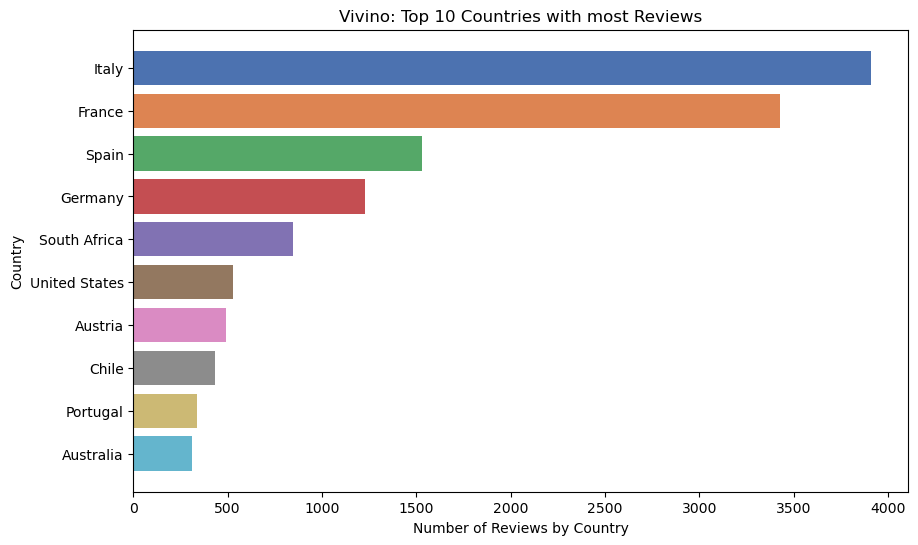

In [80]:
colors = sns.color_palette("deep", len(top_countries_vivino))

plt.figure(figsize=(10, 6))
plt.barh(top_countries_vivino['country'], top_countries_vivino['count'], color= colors)
plt.xlabel('Number of Reviews by Country')
plt.ylabel('Country')
plt.title('Vivino: Top 10 Countries with most Reviews')
plt.gca().invert_yaxis() 
plt.show()

The top country of the original data is number 6 in this dataset

In [81]:
#top province within the US
top_region_us = vivino_data['region'][vivino_data['country'] == 'United States'].value_counts().sort_values(ascending=False).head(10)
print(top_region_us)

region
California              143
Napa Valley              87
Columbia Valley          42
Russian River Valley     19
Livermore Valley         17
Sonoma Coast             16
Lodi                     13
Central Coast            12
Los Carneros             12
Washington               11
Name: count, dtype: int64


Most of these regions are within California; reason why region has so many unique values.
We renamed all regions within the US by state (California, Oregon and New York) in Taisgaly's notebook.

In [82]:
# Sort the variety based on the count of entries in descending order
sorted_variety_vivino = vivino_data['variety'].value_counts().sort_values(ascending=False)

# Select the top 10 variety
top_vivino_variety = sorted_variety_vivino.head(10)

top_variety_vivino = pd.DataFrame(top_vivino_variety).reset_index(drop=False)
top_variety_vivino

,variety,count
0,Riesling,690
1,Chardonnay,555
2,Cabernet Sauvignon,547
3,Sauvignon Blanc,354
4,Champagne,307
5,Pinot Noir,279
6,Rosso,265
7,Chianti,227
8,Tinto,197
9,Syrah,192


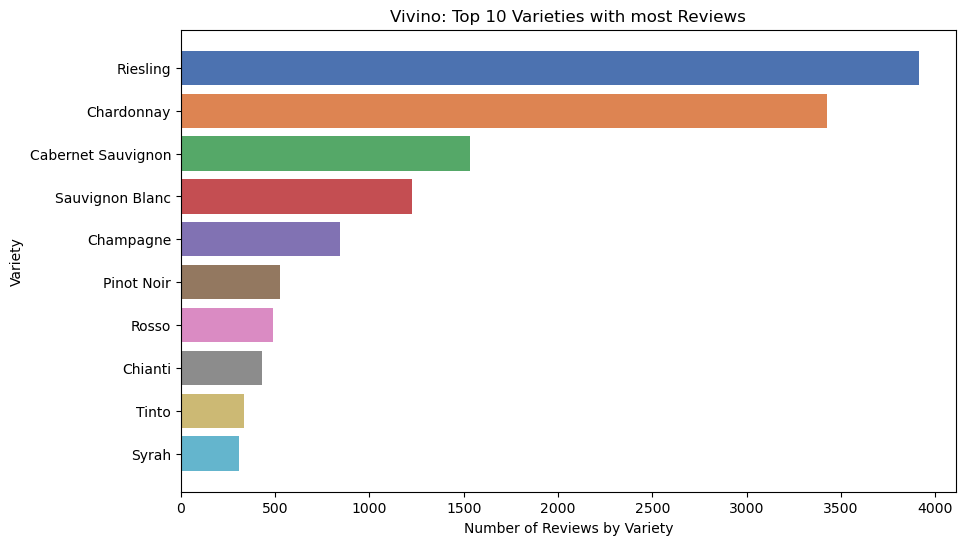

In [83]:
colors = sns.color_palette("deep", len(top_variety_vivino))

plt.figure(figsize=(10, 6))
plt.barh(top_variety_vivino['variety'], top_countries_vivino['count'], color= colors)
plt.xlabel('Number of Reviews by Variety')
plt.ylabel('Variety')
plt.title('Vivino: Top 10 Varieties with most Reviews')
plt.gca().invert_yaxis() 
plt.show()

In [84]:
lowest_price_high_rating_vivino = vivino_data[(vivino_data['price'] < 10.0) & (vivino_data['rating'] > 4.5)]
lowest_price_high_rating_vivino

,name,country,region,winery,rating,price,year,variety


## -----------------------------------------------------------------------------------------------------

In [85]:
merged_data = pd.merge(wine_data, vivino_data, left_on=['variety', 'year','winery','country'], 
             right_on=['variety', 'year','winery','country'])

In [86]:
merged_data.shape

(234, 13)

In [87]:
merged_data

,country,description,points,price_x,province,title,variety,winery,year,name,region,rating,price_y
0,Germany,"Fresh and fragrant of blossoms, tart yellow pe...",91,30.0,Mosel,Fritz Haag 2014 Brauneberger Feinherb Riesling...,Riesling,Fritz Haag,2014,Riesling Trocken,Mosel,3.8,10.67
1,Germany,Just a touch of honey-lemon sweetness is enoug...,91,22.0,Mosel,Fritz Haag 2014 Riesling (Mosel),Riesling,Fritz Haag,2014,Riesling Trocken,Mosel,3.8,10.67
2,Germany,"Irresistably juicy and fruity, yet so delicate...",93,32.0,Mosel,Fritz Haag 2014 Brauneberger Kabinett Riesling...,Riesling,Fritz Haag,2014,Riesling Trocken,Mosel,3.8,10.67
3,Germany,"Pristine layers of guava, blossom and green pl...",94,46.0,Mosel,Fritz Haag 2014 Brauneberger Juffer Auslese Ri...,Riesling,Fritz Haag,2014,Riesling Trocken,Mosel,3.8,10.67
4,Germany,Jolts of lemon-lime acidity reverberate throug...,91,42.0,Mosel,Fritz Haag 2014 Juffer Trocken GG Riesling (Mo...,Riesling,Fritz Haag,2014,Riesling Trocken,Mosel,3.8,10.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Austria,A rather subdued nose turns into a citric pool...,88,NaN,Südsteiermark,Gross 2014 Jakobi Sauvignon Blanc (Südsteiermark),Sauvignon Blanc,Gross,2014,Steirische Klassik Sauvignon Blanc,SÃ¼dsteiermark,3.7,19.39
230,Austria,Grassy notes with overtones of nettle and elde...,91,NaN,Südsteiermark,Gross 2014 Steirische Klassik Sauvignon Blanc ...,Sauvignon Blanc,Gross,2014,Steirische Klassik Sauvignon Blanc,SÃ¼dsteiermark,3.7,19.39
231,Argentina,"Harsh, grassy, weedy berry aromas mix with a h...",81,14.0,Mendoza Province,Kaiken 2016 Reserva Malbec (Mendoza),Malbec,Kaiken,2016,Mai The First A.Montes Malbec,Mendoza,4.4,61.05
232,France,"This is a smooth, ripe style of Sauvignon Blan...",86,11.0,France Other,Lionel Osmin & Cie 2016 La Réserve Sauvignon B...,Sauvignon Blanc,Lionel Osmin & Cie,2016,Domaine San de Guilhem Colombard - Sauvignon B...,Gascogne,3.5,5.31


In [88]:
merged_data.duplicated(subset=['variety', 'winery', 'year', 'name', 'rating']).sum()

115

In [89]:
merged_data.drop_duplicates(subset=['variety', 'winery', 'year', 'name', 'rating'], keep='first', inplace=True)

In [90]:
merged_data.shape #We lost almost all of the data...

(119, 13)

In [91]:
merged_data.duplicated().sum()

0

In [92]:
#merged_data

In [93]:
merged_data.rename(columns={'price_x': 'price_point', 'price_y':'price_rating'}, inplace=True)

<Axes: xlabel='points', ylabel='rating'>

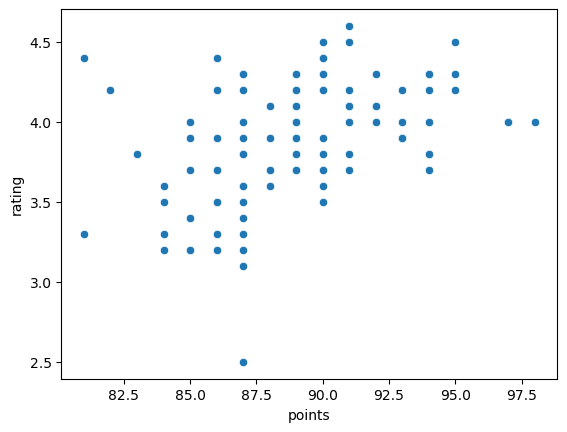

In [94]:
sns.scatterplot(x = "points", y = "rating", data = merged_data)

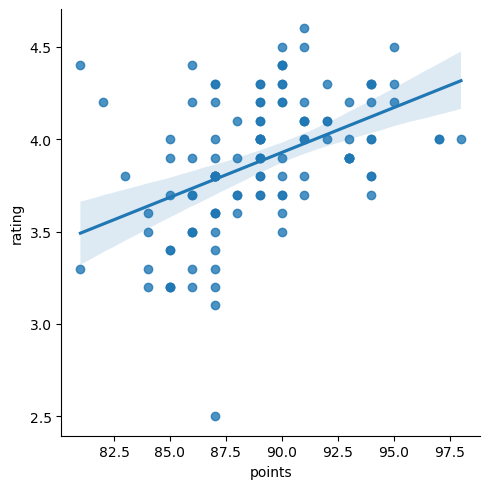

In [95]:
sns.lmplot(x='points', y='rating', data=merged_data)

In [96]:
outlier_1 = merged_data[(merged_data['points'] < 87.5) & (merged_data['rating'] < 2.6)]
outlier_1

,country,description,points,price_point,province,title,variety,winery,year,name,region,rating,price_rating
218,France,Touches of crushed purple violets add depth an...,87,11.0,Languedoc-Roussillon,Fortant 2016 Coast Select Cabernet Sauvignon (...,Cabernet Sauvignon,Fortant,2016,Cabernet Sauvignon,Pays d'Oc,2.5,8.29


In [97]:
outlier_2 = merged_data[(merged_data['points'] < 82) & (merged_data['rating'] < 4.5)]
outlier_2
#The outlier we are looking for is index 231

,country,description,points,price_point,province,title,variety,winery,year,name,region,rating,price_rating
211,Argentina,"Muddy plum and berry aromas lead to a sharp, r...",81,9.0,Other,Callia 2014 Alta Malbec (Tulum Valley),Malbec,Callia,2014,Esperado Shiraz - Malbec,Tulum Valley,3.3,7.00
231,Argentina,"Harsh, grassy, weedy berry aromas mix with a h...",81,14.0,Mendoza Province,Kaiken 2016 Reserva Malbec (Mendoza),Malbec,Kaiken,2016,Mai The First A.Montes Malbec,Mendoza,4.4,61.05


In [98]:
outlier_3 = merged_data[(merged_data['rating'] > 4.5)]
outlier_3

,country,description,points,price_point,province,title,variety,winery,year,name,region,rating,price_rating
54,Argentina,"Smooth, savory aromas of prune and blackberry ...",91,120.0,Mendoza Province,El Enemigo 2014 Gran Enemigo Gualtallary Singl...,Cabernet Franc,El Enemigo,2014,Gran Enemigo Single Vineyard Gualtallary Caber...,Gualtallary,4.6,82.86


In [99]:
outlier_3['title'] #They seem to be duplicates but they are different bottles

54    El Enemigo 2014 Gran Enemigo Gualtallary Singl...
Name: title, dtype: object

In [100]:
X = sm.add_constant(merged_data['rating'])

# Fit OLS model (ordinary least squares)
model = sm.OLS(merged_data['points'], X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     29.73
Date:                Thu, 16 May 2024   Prob (F-statistic):           2.80e-07
Time:                        11:24:54   Log-Likelihood:                -300.32
No. Observations:                 119   AIC:                             604.6
Df Residuals:                     117   BIC:                             610.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.8448      2.985     24.403      0.0